# Working with Data APIs

This lecture material was originally developed by Sam Maurer in 2017, and has been updated.

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Mapbox Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

Before jumping in, let's quickly scan the range of APIs that are available:

* Socrata Open Data: https://dev.socrata.com/
  * San Francisco: https://datasf.org/opendata/
  * Berkeley: https://data.cityofberkeley.info/

* US Census Bureau: https://www.census.gov/data/developers/data-sets.html
* Bureau of Labor Statistics: https://www.bls.gov/developers/
* US Geological Survey: https://www.usgs.gov/products/data-and-tools/apis
* US Environmental Protection Agency: https://www.epa.gov/enviro/web-services

* Google APIs: https://console.developers.google.com/apis/library?project=cp255-185021
* Facebook: https://developers.facebook.com/docs/apis-and-sdks/
* Twitter: https://developer.twitter.com/en/docs/api-reference-index.html
* Foursquare: https://developer.foursquare.com/
* Instagram: https://www.instagram.com/developer/
* Yelp: https://www.yelp.com/developers

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?

print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1538881383000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":286},"features":[{"type":"Feature","properties":{"mag":2.6,"place":"53km S of Glennallen, Alaska","time":1538879698337,"updated":1538879964041,"tz":-540,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak20272438","detail":"https://earthquake.usgs.gov/ear


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary (loads = "load string")
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the dictionary

pp.pprint(data)

{'bbox': [-178.6064, -56.1601, 0, 174.1602, 69.6439, 579.32],
 'features': [{'geometry': {'coordinates': [-145.6663, 61.6337, 181.7],
                            'type': 'Point'},
               'id': 'ak20272438',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '20272438',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak20272438.geojson',
                              'dmin': None,
                              'felt': None,
                              'gap': None,
                              'ids': ',ak20272438,',
                              'mag': 2.6,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'ak',
                              'nst': None,
                              'place': '53km S of Glennallen, Alaska',
                              'rms': 1.1,
             

               'properties': {'alert': None,
                              'cdi': None,
                              'code': '20272046',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak20272046.geojson',
                              'dmin': None,
                              'felt': None,
                              'gap': None,
                              'ids': ',ak20272046,us1000h83p,',
                              'mag': 2.6,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'ak',
                              'nst': None,
                              'place': '70km SSW of Kaktovik, Alaska',
                              'rms': 0.67,
                              'sig': 104,
                              'sources': ',ak,us,',
                              'status': 'automatic',
                              'time': 1538832782463,
                

                              'mag': 3.21,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 7,
                              'place': '36km NNW of Charlotte Amalie, U.S. '
                                       'Virgin Islands',
                              'rms': 0.33,
                              'sig': 159,
                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1538783317710,
                              'title': 'M 3.2 - 36km NNW of Charlotte Amalie, '
                                       'U.S. Virgin Islands',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -240,
                              'updated': 1538805957825,
    

                              'sig': 153,
                              'sources': ',pr,us,',
                              'status': 'reviewed',
                              'time': 1538757509330,
                              'title': 'M 3.2 - 6km SSE of Boca de Yuma, '
                                       'Dominican Republic',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -240,
                              'updated': 1538763845040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2018278006'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-146.8132, 60.9888, 20.6],
                            'type': 'Point'},
               'id': 'ak20271492',
               'properties': {'alert': None,
                              'cdi': None,
                     

                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak20271361'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [149.6856, -3.4337, 10],
                            'type': 'Point'},
               'id': 'us1000h7di',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '1000h7di',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h7di.geojson',
                              'dmin': 2.584,
                              'felt': None,
                              'gap': 82,
                              'ids': ',us1000h7di,',
                              'mag': 5,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': '155km SW of Kavien

               'properties': {'alert': None,
                              'cdi': None,
                              'code': '20270949',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak20270949.geojson',
                              'dmin': None,
                              'felt': None,
                              'gap': None,
                              'ids': ',ak20270949,us1000h6yg,',
                              'mag': 3.7,
                              'magType': 'ml',
                              'mmi': 2.33,
                              'net': 'ak',
                              'nst': None,
                              'place': '88km E of Chernabura Island, Alaska',
                              'rms': 0.53,
                              'sig': 211,
                              'sources': ',ak,us,',
                              'status': 'reviewed',
                              'time': 1538661808866,
          

                              'mag': 3.11,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 8,
                              'place': '54km NE of Punta Cana, Dominican '
                                       'Republic',
                              'rms': 0.42,
                              'sig': 149,
                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1538637268460,
                              'title': 'M 3.1 - 54km NE of Punta Cana, '
                                       'Dominican Republic',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -300,
                              'updated': 1538653274779,
                    

                              'sig': 148,
                              'sources': ',ak,',
                              'status': 'automatic',
                              'time': 1538615500093,
                              'title': 'M 3.1 - 123km NW of Arctic Village, '
                                       'Alaska',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,',
                              'tz': -540,
                              'updated': 1538615860508,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak20270427'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-68.4435, 19.351, 66],
                            'type': 'Point'},
               'id': 'pr2018277003',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '20182770

                              'types': ',geoserve,origin,phase-data,',
                              'tz': -600,
                              'updated': 1538590672688,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000h681'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [120.3166, -10.5748, 10],
                            'type': 'Point'},
               'id': 'us1000h67z',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '1000h67z',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h67z.geojson',
                              'dmin': 2.702,
                              'felt': None,
                              'gap': 79,
                              'ids': ',us1000h67z,',
                              'mag': 4.6,
                              'magType': 'mb',
               

               'properties': {'alert': None,
                              'cdi': None,
                              'code': '2018276001',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2018276001.geojson',
                              'dmin': 1.1715,
                              'felt': None,
                              'gap': 259,
                              'ids': ',pr2018276001,',
                              'mag': 3.1,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 5,
                              'place': '122km NNE of Punta Cana, Dominican '
                                       'Republic',
                              'rms': 0.08,
                              'sig': 148,
                              'sources': ',pr,',
                              'status': 'reviewed',
                       

                              'ids': ',us1000h5np,',
                              'mag': 4.9,
                              'magType': 'mb',
                              'mmi': None,
                              'net': 'us',
                              'nst': None,
                              'place': 'South of Tonga',
                              'rms': 0.48,
                              'sig': 369,
                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1538496117900,
                              'title': 'M 4.9 - South of Tonga',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -720,
                              'updated': 1538498466040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000h5np'},
 

                              'sources': ',us,',
                              'status': 'reviewed',
                              'time': 1538461584840,
                              'title': 'M 4.7 - 55km S of Sarangani, '
                                       'Philippines',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': 480,
                              'updated': 1538473261040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000h5ib'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [120.29, -10.5031, 15.89],
                            'type': 'Point'},
               'id': 'us1000h5i1',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '1000h5i1',
                              '

                              'types': ',geoserve,moment-tensor,origin,phase-data,',
                              'tz': 480,
                              'updated': 1538499097040,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000h5eb'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-146.6434, 69.2196, 0.1],
                            'type': 'Point'},
               'id': 'ak20268689',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '20268689',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak20268689.geojson',
                              'dmin': None,
                              'felt': None,
                              'gap': None,
                              'ids': ',ak20268689,us1000h5e9,',
                              'mag': 3,
                              'magType

                            'type': 'Point'},
               'id': 'ci37376114',
               'properties': {'alert': None,
                              'cdi': 3.8,
                              'code': '37376114',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ci37376114.geojson',
                              'dmin': 0.06715,
                              'felt': 198,
                              'gap': 25,
                              'ids': ',ci37376114,',
                              'mag': 3.48,
                              'magType': 'ml',
                              'mmi': 4.17,
                              'net': 'ci',
                              'nst': 143,
                              'place': '4km ENE of Calimesa, CA',
                              'rms': 0.18,
                              'sig': 262,
                              'sources': ',ci,',
                              'status': 'reviewed',
         

                              'dmin': 0.76,
                              'felt': None,
                              'gap': 329,
                              'ids': ',pr2018274008,',
                              'mag': 3.03,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 8,
                              'place': '73km SW of Pole Ojea, Puerto Rico',
                              'rms': 0.38,
                              'sig': 141,
                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1538381078870,
                              'title': 'M 3.0 - 73km SW of Pole Ojea, Puerto '
                                       'Rico',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase

                              'nst': 10,
                              'place': '59km NNW of Charlotte Amalie, U.S. '
                                       'Virgin Islands',
                              'rms': 0.29,
                              'sig': 116,
                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1538352856710,
                              'title': 'M 2.7 - 59km NNW of Charlotte Amalie, '
                                       'U.S. Virgin Islands',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -240,
                              'updated': 1538368568377,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2018274000'},
               'type': 'Feature'},
              {'geometry': {'coordinates

                              'time': 1538338018090,
                              'title': 'M 2.6 - 61km NNW of Charlotte Amalie, '
                                       'U.S. Virgin Islands',
                              'tsunami': 0,
                              'type': 'earthquake',
                              'types': ',geoserve,origin,phase-data,',
                              'tz': -240,
                              'updated': 1538354639510,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2018273017'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-65.1341, 18.8788, 25],
                            'type': 'Point'},
               'id': 'pr2018273016',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '2018273016',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2018273016

                              'types': ',dyfi,focal-mechanism,geoserve,nearby-cities,origin,phase-data,scitech-link,shakemap,',
                              'tz': -480,
                              'updated': 1538751654160,
                              'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ci37374890'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [120.182, -1.2875, 10],
                            'type': 'Point'},
               'id': 'us1000h4p2',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '1000h4p2',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000h4p2.geojson',
                              'dmin': 2.456,
                              'felt': None,
                              'gap': 63,
                              'ids': ',us1000h4p2,',
                              'mag': 4.8,
       

                              'cdi': None,
                              'code': '2018273005',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/pr2018273005.geojson',
                              'dmin': 1.0192,
                              'felt': None,
                              'gap': 341,
                              'ids': ',pr2018273005,',
                              'mag': 2.81,
                              'magType': 'md',
                              'mmi': None,
                              'net': 'pr',
                              'nst': 4,
                              'place': '71km N of Culebra, Puerto Rico',
                              'rms': 0.25,
                              'sig': 121,
                              'sources': ',pr,',
                              'status': 'reviewed',
                              'time': 1538296465490,
                              'title': 'M 2.8 - 71km N of Culebra, Pu

In [6]:
# subsets of the data can be accessed with square brackets, using labels for the 
# named elements and numerals for the lists

# save the list of quakes to a new variable

quakes = data['features']

# print the most recent quake

pp.pprint(quakes[0])

{'geometry': {'coordinates': [-145.6663, 61.6337, 181.7], 'type': 'Point'},
 'id': 'ak20272438',
 'properties': {'alert': None,
                'cdi': None,
                'code': '20272438',
                'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak20272438.geojson',
                'dmin': None,
                'felt': None,
                'gap': None,
                'ids': ',ak20272438,',
                'mag': 2.6,
                'magType': 'ml',
                'mmi': None,
                'net': 'ak',
                'nst': None,
                'place': '53km S of Glennallen, Alaska',
                'rms': 1.1,
                'sig': 104,
                'sources': ',ak,',
                'status': 'automatic',
                'time': 1538879698337,
                'title': 'M 2.6 - 53km S of Glennallen, Alaska',
                'tsunami': 0,
                'type': 'earthquake',
                'types': ',geoserve,origin,',
                'tz':

In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.6 - 53km S of Glennallen, Alaska
M 4.5 - 17km NW of Roshtqal'a, Tajikistan
M 4.8 - 12km N of Shinshiro, Japan
M 4.4 - 7km ESE of Chuquitira, Peru
M 4.9 - 67km SSW of Intipuca, El Salvador
M 5.9 - 19km NW of Ti Port-de-Paix, Haiti
M 5.6 - Central Mid-Atlantic Ridge
M 4.9 - 71km W of Kandrian, Papua New Guinea
M 3.3 - 63km SE of Punta Cana, Dominican Republic
M 4.5 - 23km WSW of `Alaqahdari-ye Kiran wa Munjan, Afghanistan
M 4.3 - 205km NNW of Pubu, China
M 4.1 - 41km SSE of Pirgos, Greece
M 3.3 - 108km NNW of Arctic Village, Alaska
M 2.7 - 8km NE of Incline Village, Nevada
M 2.6 - 28km N of Shasta Lake, CA
M 2.5 - 35km NNE of Nikiski, Alaska
M 5.0 - 11km ESE of Kimbe, Papua New Guinea
M 3.3 - 104km NNW of Arctic Village, Alaska
M 4.2 - Western Xizang
M 3.3 - 87km WSW of Kaktovik, Alaska
M 4.8 - 147km E of Nago, Japan
M 3.2 - 48km SW of Christiansted, U.S. Virgin Islands
M 2.6 - 70km SSW of Kaktovik, Alaska
M 4.1 - 18km NNW of Baghlan, Afghanistan
M 4.4 - 118km SW of Kota Ternate, Ind

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?

print(len(df))

286


In [9]:
# print the first few lines of data

print(df.head())

    depth  magnitude
0  181.70        2.6
1  119.71        4.5
2   41.56        4.8
3  162.52        4.4
4   49.70        4.9


In [10]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  286.000000  286.000000
mean    45.238727    3.761783
std     82.139861    0.989118
min      0.000000    2.450000
25%     10.000000    2.900000
50%     16.055000    3.500000
75%     46.750000    4.600000
max    579.320000    6.600000


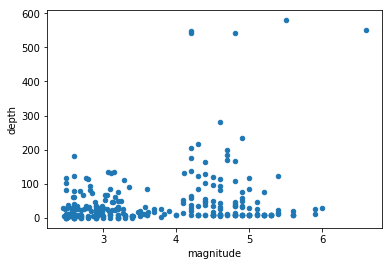

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.read_csv('usgs_earthquake_data.csv')

print(new_df.head())

   Unnamed: 0   depth  magnitude
0           0  181.70        2.6
1           1  119.71        4.5
2           2   41.56        4.8
3           3  162.52        4.4
4           4   49.70        4.9


# Part 2: Querying an API endpoint

### Mapbox Geocoding API

Services like Google Maps and Mapbox have various APIs that let you access its services through code instead of through GUI apps. This one from Mapbox lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://www.mapbox.com/api-documentation/#geocoding

**API endpoint:**  
https://api.mapbox.com/geocoding/v5/mapbox.places

**API endpoint with query parameters:**  
https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster+Hall.json?access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w

You can get your own access key by signing up for a Mapbox account, if you'd like. Here is a link for that (but don't do it now): https://www.mapbox.com/signin/?route-to=%22/account/access-tokens%22

In [14]:
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://api.mapbox.com/geocoding/v5/mapbox.places/'

address = 'Wurster Hall'

params = {'limit': 1,
          'access_token': 'pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w'}

url = requests.Request('GET', endpoint+address+'.json', params=params).prepare().url
print(url)

https://api.mapbox.com/geocoding/v5/mapbox.places/Wurster%20Hall.json?limit=1&access_token=pk.eyJ1IjoiY3AyNTVkZW1vIiwiYSI6ImRPcTlnTUEifQ.3C0d0Nk_rcwV-8JF29PU-w


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'type': 'FeatureCollection', 'query': ['wurster', 'hall'], 'features': [{'id': 'poi.1359351', 'type': 'Feature', 'place_type': ['poi'], 'relevance': 1, 'properties': {'tel': '(510) 642-0831', 'address': '230 Wurster Hall #1820', 'category': 'college, university', 'landmark': True, 'maki': 'college'}, 'text': 'Wurster Hall / College of Environmental Design', 'place_name': 'Wurster Hall / College of Environmental Design, 230 Wurster Hall #1820, Berkeley, California 94720, United States', 'center': [-122.25488, 37.87082], 'geometry': {'type': 'Point', 'coordinates': [-122.25488, 37.87082]}, 'context': [{'id': 'postcode.1038777018848930', 'text': '94720'}, {'id': 'place.4062647275990170', 'wikidata': 'Q484678', 'text': 'Berkeley'}, {'id': 'region.3591', 'short_code': 'US-CA', 'wikidata': 'Q99', 'text': 'California'}, {'id': 'country.3145', 'short_code': 'us', 'wikidata': 'Q30', 'text': 'United States'}]}], 'attribution': 'NOTICE: © 2018 Mapbox and its suppliers. All rights reserved. Use o

In [ ]:
# print it more nicely

pp.pprint(data)

In [ ]:
# pull out the lat-lon coordinates

for r in data['features']:
    coords = r['geometry']['coordinates']
    print(coords)

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://www.mapbox.com/api-documentation/#geocoding). Can you figure out how to retrieve other points of interest near Wurster Hall?

# Part 3: Querying an API with back-and-forth authentication

### Twitter search APIs

Twitter's APIs operate over the web as well, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
http://geduldig.github.io/TwitterAPI/

In [ ]:
from TwitterAPI import TwitterAPI

import pprint
pp = pprint.PrettyPrinter()

In [ ]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [ ]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

### Making a simple data request

In [ ]:
# most recent tweet from CED

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'wursterlife', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

In [ ]:
# what other data is there?

pp.pprint(tweet)

### Other API endpoints allow different types of searches

In [ ]:
# search for recent tweets with your favorite emoji

endpoint = 'search/tweets'
params = {
    'q': '👻🎃', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

In [ ]:
# search for public tweets in Korean

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ko', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

In [ ]:
# search for public tweets geotagged near the UC Berkeley campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '37.873,-122.260,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [ ]:
# Twitter allows only one or two simultaneous streaming connections for 
# each set of API credentials, so this part may not work during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

### Exercises for the remainder of class

Choose your favorite:

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. The earthquakes API is actually returning a specific data format called [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), also used by many other geospatial data feeds. Try saving the raw GeoJSON file and opening it in QGIS or in the [geojson.io](http://geojson.io) web viewer.  
   &nbsp;

2. Using the geocoding example as a starting point, try searching Mapbox's Directions API or Isochrone (travel time contours) API instead. You can read more about them on the [Mapbox API documentation page](https://www.mapbox.com/api-documentation/#introduction).  
    &nbsp;

3. Try out another API that you're interested in. Can you figure out how to connect to it using Python?  

   With municipal data it's often easiest to just download a data file, but APIs are great for querying big data sets or tracking live updates. Here are some resources.

   - San Francisco:  https://data.sfgov.org/developers  
   - Alameda County:  https://data.acgov.org/developers  
   - UC Berkeley:  https://api-central.berkeley.edu  
   - US Census:  http://www.census.gov/data/developers/data-sets.html  
   - Open Data Network:  https://www.opendatanetwork.com  
   - CivicData:  http://www.civicdata.io/  